## Part 1 - Download data from Yahoo Finance(US)

In [1]:
import os
import numpy as np
import pandas as pd

import yfinance as yf

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# training set
stock_train = yf.download("GOOG", "2014-01-02", "2019-10-07")
del stock_train['Adj Close']
len(stock_train)
stock_train.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Volume
Date,,,,,
2014-01-02,555.65,556.79,552.06,554.48,3656400
2014-01-03,555.42,556.38,550.40,550.44,3345800
2014-01-06,554.43,557.34,551.15,556.57,3551800
2014-01-07,560.40,567.72,558.49,567.30,5124300
2014-01-08,570.86,571.52,564.53,568.48,4501700


In [3]:
stock_train.to_csv("google_train_2019.csv")

## Part 2 - Data Preprocessing

In [4]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# Importing the training set
dataset_train = pd.read_csv('google_train_2019.csv')
training_set = dataset_train.iloc[:, 1:2].values

# open price of training set
training_set

array([[ 555.65],
       [ 555.42],
       [ 554.43],
       ...,
       [1196.98],
       [1180.  ],
       [1191.89]])

In [6]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.07986422],
       [0.07956962],
       [0.07830152],
       ...,
       [0.90134495],
       [0.87959524],
       [0.89482516]])

In [7]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(stock_train)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


## Part 3- Building the RNN

In [8]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [9]:
# Initialising the RNN
regressor = Sequential()

In [10]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [12]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [13]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [14]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [15]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [16]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 1, batch_size = 32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/1
1390/1390 [==============================] - 22s 16ms/step - loss: 0.0435


## Part 4 - Making the predictions and visualising the results

In [36]:
# Getting the predicted stock price of 2017
dataset_total = dataset_train['Open']
inputs = dataset_total[-80:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

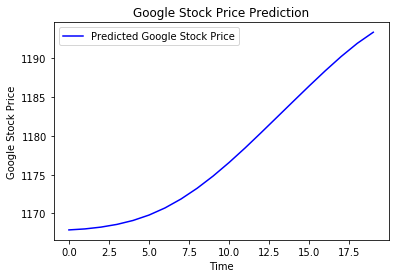

In [34]:
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [ ]:
fig, axs = plt.subplots(2,2)
